In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

random_state = 22520109
np.random.seed(random_state)

#load data
tesla_stock = pd.read_csv('tesla_stock.csv')

X0 = tesla_stock.drop(columns=['Close'])
Y0 = tesla_stock['Close']

#scale
X0 = scale(X0)
Y0 = scale(Y0)

#split data
X, X_test, y, y_test = train_test_split(X0, Y0, test_size=0.3, random_state=22520109)



In [14]:
class LinRegGD:
    def __init__(self, eta=0.001, max_it = 200, random_state=22520109):
        self.eta = eta 
        self.max_it = max_it 
        self.random_state = random_state
        self.w = None 
        self.costs = []

    def predict(self, X):
        return (X @ self.w[1:]) + self.w[0]

    def fit(self, X, y):
        #init basic values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = []

        for it in range(self.max_it):
            h = self.predict(X)         # h: hypothesis


            # h = h.reshape(h.shape[0], 1)   #fixing


            diff = y - h 


            # print(np.dot(X.T, diff).shape) #fixing 2
            # print(self.w[1:].shape)
            

            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)


            #inspecting
            # print("\n\n\n np.dot(X.T, diff): ", end = '')
            # print("X.T.shape = {}, diff.shape = {}".format(X.T.shape, diff.shape))
            # print("w[1:].shape = {}".format(self.w[1:].shape))
            # print(self.w[1:])

            cost = np.sum(diff ** 2)/ (2 * X.shape[0])
            self.costs.append(cost)




0.9987 [-1.02936260e-04  3.28705352e-01  3.29021817e-01  3.40475035e-01
  9.67215503e-04]
0.99972 [ 2.31821052e-04 -5.95699059e-01  8.98968328e-01  6.97574700e-01
 -1.49455907e-03]


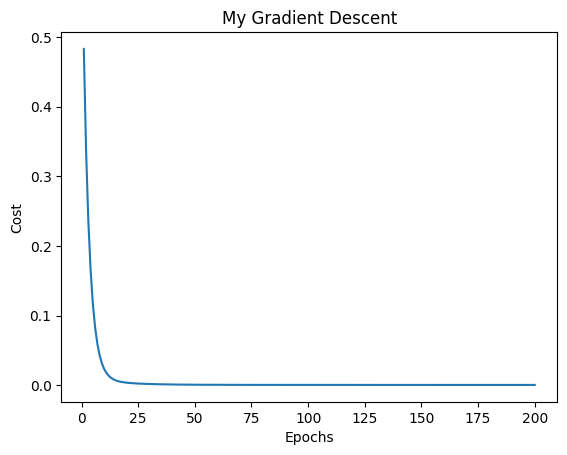

In [21]:

#train with my model 
myGD = LinRegGD(eta = 0.000031, max_it = 200, random_state=22520109)
myGD.fit(X, y)
yGD = myGD.predict(X_test)

#import model 
from sklearn.linear_model import LinearRegression
SK = LinearRegression()
SK.fit(X,y)
ySK = SK.predict(X_test)

#Compare result
from sklearn.metrics import r2_score as r2 
print(round(r2(y_test, yGD), 5), myGD.w)
print(round(r2(y_test, ySK), 5), np.insert(SK.coef_, 0, SK.intercept_))


#visualize
plt.plot(range(1, len(myGD.costs) + 1), myGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('My Gradient Descent')
plt.show()

In [46]:
#normal equation

class LinRegNE:
    def __init__(self, random_state = 22520109):
        self.random_state = random_state
        self.w = None

    def fit(self, X, y):
        pse_inv = np.linalg.inv(X.T @ X)
        w = pse_inv @ X.T @ y
        self.w = w

    def predict(self, X_test):
        yNE = X_test @ self.w 
        return yNE



In [47]:
myNE = LinRegNE(random_state = 22520109)
myNE.fit(X, y)
yNE = myNE.predict(X_test)
print(round(r2(y_test, yNE), 5))

0.99972
